Percentage of games played that were won: 49.173%
Percentage of games played that were lost.: 50.827%
the percentages of the total games played that were won or lost on a given roll 

Rolls               % won/lost on a given roll         Cumulative  %
     1                                   33.30%                0.00%
     2                                   18.83%               33.30%
     3                                   13.52%               52.12%
     4                                    9.69%               65.64%
     5                                    6.93%               75.33%
     6                                    4.98%               82.25%
     7                                    3.59%               87.23%
     8                                    2.56%               90.82%
     9                                    1.86%               93.38%
    10                                    1.30%               95.25%
    11                                    0.96%          

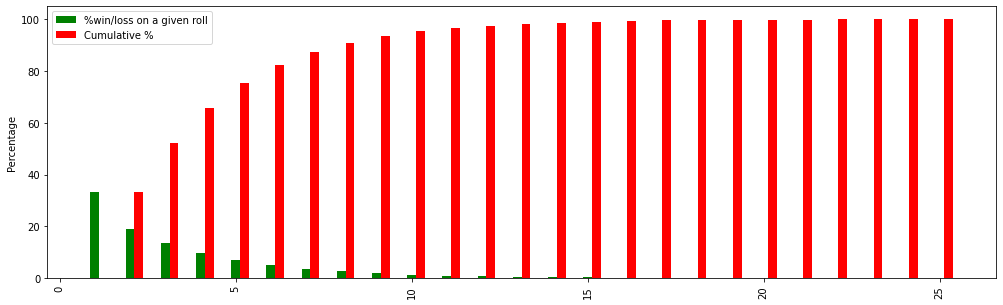

,Rolls,% win/loss_rolls,Cumulative %
0,1,33.2966,0.0000
1,2,18.8255,33.2966
2,3,13.5161,52.1221
3,4,9.6882,65.6382
4,5,6.9274,75.3264
5,6,4.9774,82.2538
6,7,3.5930,87.2312
7,8,2.5605,90.8242
8,9,1.8620,93.3847
9,10,1.3011,95.2467


In [37]:
# import necessary library
import random
import pandas as pd
import matplotlib.pyplot as plt
def RollDice(): # returns the sum of two random numbers in the range 1-6
    die1 = random.randint(1,6)
    die2 = random.randint(1,6)
    return die1+die2
def GamePlay():

    sum_dice = RollDice()
    if sum_dice in (7,11):
        return 'Win',1 # return Win and number of attempt
    elif sum_dice in (2,3,12):
        return 'Loss',1 # return Loss and number of attempt
    else:
        attempt_count=1 # keep track of attempts
        game_point=sum_dice
        while True:
            sum_dice=roll_dice()
            attempt_count = attempt_count +1 # increase attempts by 1
            if sum_dice==game_point:
                return 'Win',attempt_count # return the result and attempts
            elif sum_dice==7:
                return 'Loss',attempt_count # return the result and attempts
            else:
                continue
def Start():
    trial=1000000
    wins=0
    rolls = [0]*25
    loss=0
    for _ in range(trial):
        result,attempt = GamePlay() # store the final result and number of attempts
        if attempt<=len(rolls):
            rolls[attempt-1] = rolls[attempt-1] + 1
        else:
            rolls[-1] = rolls[-1] + 1
        if result=='Win':
            wins = wins + 1
        else:
            loss=loss+1
        

    print('Percentage of games played that were won: {:.3f}%'.format(wins*100/(trial)))
    print('Percentage of games played that were lost.: {:.3f}%'.format(loss*100/(trial)))
    print('the percentages of the total games played that were won or lost on a given roll ')
    print()
    print('{:<6}{:>40} {:>21}'.format('Rolls','% won/lost on a given roll','Cumulative  %'))
    
    list_p_result=[]
    list_c_result =[]
    for i in range(len(rolls)):
        p_result = rolls[i]*100/trial
        list_p_result.append(p_result)
        c_result = 100*sum(rolls[0:i])/trial
        if i!=len(rolls)-1:
            print('{:>6}{:>40.2f}%{:>20.2f}%'.format(i+1,p_result,c_result))
            list_c_result.append(c_result)
        else:
            print('{:>6}{:>40.2f}%{:>20.2f}%'.format(i + 1, p_result, 100*sum(rolls)/trial))
            list_c_result.append(100*sum(rolls)/trial)
    print()
    # create a table
    df=pd.DataFrame({'Rolls': list(range(1,26)),
                 '% win/loss_rolls':list_p_result,
                 'Cumulative %':list_c_result})
    
    x = df.iloc[:,0] # Rolls
    y = df.iloc[:,1] # % won/lost on a given roll
    z = df.iloc[:,2] # Cummulative %
    
    # %win/loss on a given roll is too small as compared to Cumulative %
    # Hence in bar chart,it is not visible for few values.
    
    fig = plt.figure(figsize=(17,5)) # set figure size
    plt.bar(x,y,color='g',width = 0.25,label='%win/loss on a given roll') # plot bar chart
    plt.bar(x +.25,z,color='r',width = 0.25,label='Cumulative %') 
    plt.ylabel('Percentage') # set y label 
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show() # show the plot.
    return df # return the table
Start()